In [1]:
%matplotlib inline


# Theil-Sen Regression


Computes a Theil-Sen Regression on a synthetic dataset.

See `theil_sen_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the Theil-Sen
estimator is robust against outliers. It has a breakdown point of about 29.3%
in case of a simple linear regression which means that it can tolerate
arbitrary corrupted data (outliers) of up to 29.3% in the two-dimensional
case.

The estimation of the model is done by calculating the slopes and intercepts
of a subpopulation of all possible combinations of p subsample points. If an
intercept is fitted, p must be greater than or equal to n_features + 1. The
final slope and intercept is then defined as the spatial median of these
slopes and intercepts.

In certain cases Theil-Sen performs better than `RANSAC
<ransac_regression>` which is also a robust method. This is illustrated in the
second example below where outliers with respect to the x-axis perturb RANSAC.
Tuning the ``residual_threshold`` parameter of RANSAC remedies this but in
general a priori knowledge about the data and the nature of the outliers is
needed.
Due to the computational complexity of Theil-Sen it is recommended to use it
only for small problems in terms of number of samples and features. For larger
problems the ``max_subpopulation`` parameter restricts the magnitude of all
possible combinations of p subsample points to a randomly chosen subset and
therefore also limits the runtime. Therefore, Theil-Sen is applicable to larger
problems with the drawback of losing some of its mathematical properties since
it then works on a random subset.



Automatically created module for IPython interactive environment


/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


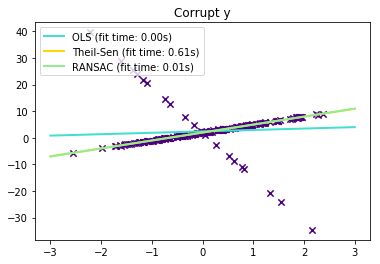

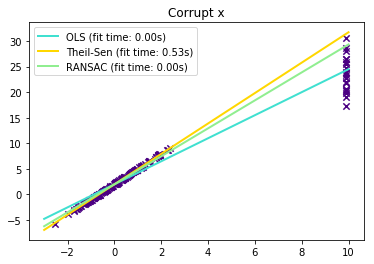

In [2]:
# Author: Florian Wilhelm -- <florian.wilhelm@gmail.com>
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

print(__doc__)

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)), ]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen'}
lw = 2

# #############################################################################
# Outliers only in the y direction

np.random.seed(0)
n_samples = 200
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
w = 3.
c = 2.
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise
# 10% outliers
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

plt.scatter(x, y, color='indigo', marker='x', s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt y")

# #############################################################################
# Outliers in the X direction

np.random.seed(0)
# Linear model y = 3*x + N(2, 0.1**2)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
# 10% outliers
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color='indigo', marker='x', s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(line_x, y_pred, color=colors[name], linewidth=lw,
             label='%s (fit time: %.2fs)' % (name, elapsed_time))

plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Corrupt x")
plt.show()